In [14]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys  
sys.path.insert(0, '../src')

import populations
import appendix_tables

In [24]:
df_beamed[df_beamed['is_bh'] == 0][['b', 'theta_half_deg']]

,b,theta_half_deg
160,0.028813,13.787364
335,0.021662,11.947331
340,0.075479,22.403757
371,0.077766,22.745116
575,0.025122,12.870100
655,0.047044,17.644350
660,0.065706,20.885556
804,0.162253,33.096996
902,0.108545,26.943335
907,0.244702,40.948618


In [16]:
df_all = populations.startrack()
df_ulx = populations.ulx()
df_beamed = populations.ulx_beamed_l_45()
df_beamed_P_wind = populations.ulx_beamed_l_45_P_wind_l_4_years()

In [6]:
interesting_cols = ['m', 'mdot_ratio', 'Lx', 'b', 'theta_half_deg', 'a*', 'zeta', 'r_isco', 'r_sph', 'r_out',  'P_wind_days']

In [7]:
df_ulx[interesting_cols]

,m,mdot_ratio,Lx,b,theta_half_deg,a*,zeta,r_isco,r_sph,r_out,P_wind_days
0,25.9,5.931652,8.641181e+39,1.000000,90.000000,0.998,NaN,1.25,7.414565,NaN,NaN
1,28.3,3.758272,7.892165e+39,1.000000,90.000000,0.998,NaN,1.25,4.697839,NaN,NaN
2,15.5,4.320441,4.581845e+39,1.000000,90.000000,0.998,NaN,1.25,5.400551,NaN,NaN
3,24.6,57.647201,6.792264e+41,0.021967,12.031480,0.998,4.691953,1.25,72.059002,13670.812080,4.034255e+02
4,28.8,9.164170,1.278377e+40,0.869234,82.486125,0.998,2.000000,1.25,11.455213,128.843554,7.705979e-04
...,...,...,...,...,...,...,...,...,...,...,...
5715,6.7,8.819161,2.721416e+39,0.938573,86.478303,0.998,2.000000,1.25,11.023952,114.832579,1.296825e-04
5845,8.1,3.404269,2.162729e+39,1.000000,90.000000,0.998,NaN,1.25,4.255336,NaN,NaN
8227,1.2,12.802483,1.147657e+39,0.445384,56.315720,0.010,2.000000,6.00,76.814896,1686.192176,6.015463e+00
10258,1.5,12.605521,1.384696e+39,0.459411,57.276245,0.010,2.000000,6.00,75.633128,1609.559078,6.591048e+00


In [48]:
df_all_bh = df_all[df_all['is_bh']==1]
df_all_ns = df_all[df_all['is_bh']==0]
df_ulx_bh = df_ulx[df_ulx['is_bh']==1]
df_ulx_ns = df_ulx[df_ulx['is_bh']==0]
df_beamed_bh = df_beamed[df_beamed['is_bh']==1]
df_beamed_ns = df_beamed[df_beamed['is_bh']==0]

In [49]:
df_all.columns

Index(['mdot', 'm', 'Z', 'tage', 'is_bh', 'mdot_gs', 'LEdd', 'MEdd',
       'mdot_ratio', 'XLsph', 'XLsph2', 'LXtot', 'b', 'Lx', 'ratio',
       'ratio_beamed', 'theta', 'theta_deg', 'theta_half_deg', 'zeta', 'R_g',
       'a*', 'r_schw', 'r_isco_nospin', 'r_isco', 'r_sph', 'r_out',
       'P_inflow_at_rsph', 'P_envelope', 'P_wind', 'P_inflow_days',
       'P_envelope_days', 'P_wind_days'],
      dtype='object')

In [50]:
junk_columns = ['mdot_gs', 'XLsph', 'XLsph2', 'ratio', 'ratio_beamed', 'theta', 'theta_deg']
gr_columns = ['zeta', 'r_schw', 'r_isco_nospin', 'r_isco', 'r_out', 'P_wind', 'r_sph']
# df_all = df_all.drop([*junk_columns, *gr_columns], axis=1) #Drop unused/axilary column headers
# df_all[['Z', 'tage', 'm', 'mdot', 'is_bh', 'b', 'Lx', 'LEdd', 'LXtot']]

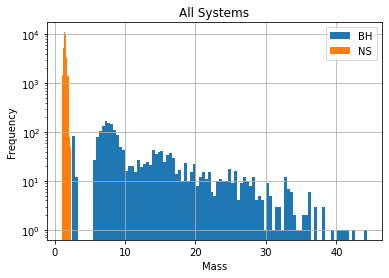

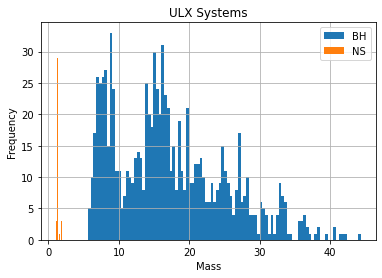

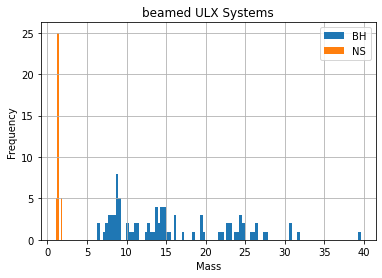

In [51]:
fig, ax = plt.subplots()
plt.title('All Systems')
plt.xlabel('Mass')
plt.ylabel('Frequency')
df_all_bh['m'].hist(ax=ax, bins=100, label='BH')
df_all_ns['m'].hist(ax=ax, bins=10, label='NS')
ax.set_yscale('log')
plt.legend()

fig, ax = plt.subplots()
plt.title('ULX Systems')
plt.xlabel('Mass')
plt.ylabel('Frequency')
df_ulx_bh['m'].hist(ax=ax, bins=100, label='BH')
df_ulx_ns['m'].hist(ax=ax, bins=10, label='NS')
plt.legend()


fig, ax = plt.subplots()
plt.title('beamed ULX Systems')
plt.xlabel('Mass')
plt.ylabel('Frequency')
df_beamed_bh['m'].hist(ax=ax, bins=100, label='BH')
df_beamed_ns['m'].hist(ax=ax, bins=5, label='NS')
plt.legend()

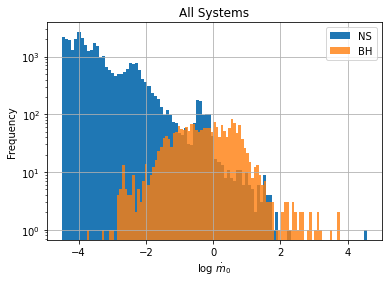

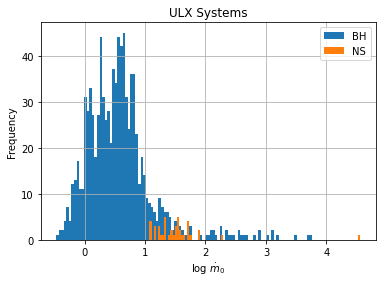

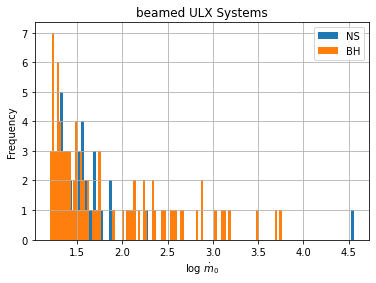

In [52]:
fig, ax = plt.subplots()
plt.title('All Systems')
plt.xlabel(r'log $\dot{m}_{0}$')
plt.ylabel('Frequency')
df_all = df_all[df_all['mdot_ratio'] < 30000]
np.log10(df_all_ns['mdot_ratio']).hist(ax=ax, bins=100, label='NS')
np.log10(df_all_bh['mdot_ratio']).hist(ax=ax, bins=100, label='BH', alpha=0.8)
plt.legend()

ax.set_yscale('log')

fig, ax = plt.subplots()
plt.title('ULX Systems')
plt.xlabel(r'log $\dot{m}_{0}$')
plt.ylabel('Frequency')
df_ulx = df_ulx[df_ulx['mdot_ratio'] < 30000]
np.log10(df_ulx_bh['mdot_ratio']).hist(ax=ax, bins=100, label='BH')
np.log10(df_ulx_ns['mdot_ratio']).hist(ax=ax, bins=100, label='NS')
#ax.set_yscale('log')
plt.legend()

fig, ax = plt.subplots()
plt.title('beamed ULX Systems')
plt.xlabel(r'log $\dot{m}_{0}$')
plt.ylabel('Frequency')
df_beamed = df_beamed[df_beamed['mdot_ratio'] < 30000]
np.log10(df_beamed_ns['mdot_ratio']).hist(ax=ax, bins=100, label='NS')
np.log10(df_beamed_bh['mdot_ratio']).hist(ax=ax, bins=100, label='BH')
#ax.set_yscale('log')
plt.legend()


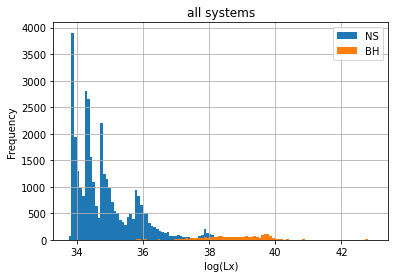

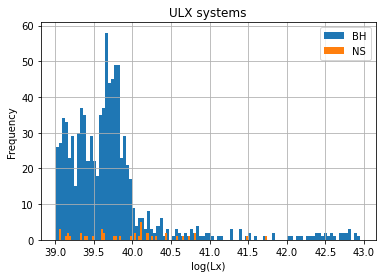

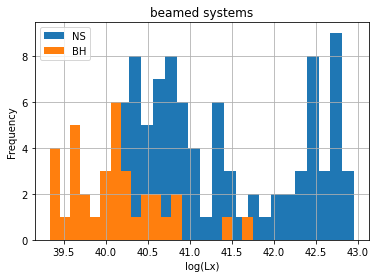

In [53]:
plt.figure()
plt.title('all systems')
plt.xlabel('log(Lx)')
plt.ylabel('Frequency')
np.log10(df_all_ns['Lx']).hist(bins=100, label='NS')
np.log10(df_all_bh['Lx']).hist(bins=100, label='BH')
plt.legend()


plt.figure()
plt.title('ULX systems')
plt.xlabel('log(Lx)')
plt.ylabel('Frequency')
np.log10(df_ulx_bh['Lx']).hist(bins=100, label='BH')
np.log10(df_ulx_ns['Lx']).hist(bins=100, label='NS')
plt.legend()

plt.figure()
plt.title('beamed systems')
plt.xlabel('log(Lx)')
plt.ylabel('Frequency')
np.log10(df_beamed_bh['Lx']).hist(bins=20, label='NS')
np.log10(df_beamed_ns['Lx']).hist(bins=20, label='BH')
plt.legend()



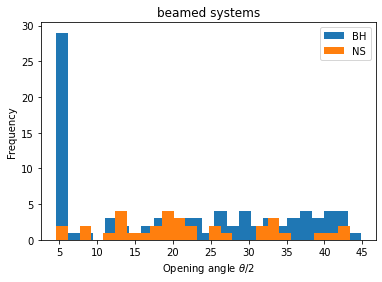

In [71]:
plt.title('beamed systems')
plt.xlabel(r'Opening angle $\theta / 2$')
plt.ylabel('Frequency')
df_beamed_bh['theta_half_deg'].hist(bins=25, label='BH')
df_beamed_ns['theta_half_deg'].hist(bins=25, label='NS')
plt.grid(b=None)
plt.legend()


In [55]:
df_beamed.columns

Index(['mdot', 'm', 'Z', 'tage', 'is_bh', 'mdot_gs', 'LEdd', 'MEdd',
       'mdot_ratio', 'XLsph', 'XLsph2', 'LXtot', 'b', 'Lx', 'ratio',
       'ratio_beamed', 'theta', 'theta_deg', 'theta_half_deg', 'zeta', 'R_g',
       'a*', 'r_schw', 'r_isco_nospin', 'r_isco', 'r_sph', 'r_out',
       'P_inflow_at_rsph', 'P_envelope', 'P_wind', 'P_inflow_days',
       'P_envelope_days', 'P_wind_days'],
      dtype='object')

In [56]:
pd.set_option('display.max_rows', 500)

In [57]:
df_beamed[interesting_cols]

,m,mdot_ratio,Lx,b,a*,zeta,r_isco,r_sph,r_out,P_wind_days
3,24.6,57.647201,6.792264e+41,0.021967,0.998,4.691953,6,345.883207,6.561990e+04,4.461564e+04
27,24.6,17.614423,4.853973e+40,0.235281,0.998,2.000000,6,105.686536,4.391670e+03,1.878552e+01
28,8.2,124.902269,1.225455e+42,0.004679,0.998,10.300672,6,749.413616,3.040184e+05,1.269923e+06
37,22.7,746.196885,6.482260e+42,0.003200,0.998,61.749621,6,4477.181310,1.081385e+07,1.189892e+11
40,13.8,27.117856,7.173582e+40,0.099269,0.998,2.073618,6,162.707137,1.545581e+04,3.869012e+02
53,25.9,21.293110,7.834106e+40,0.161007,0.998,2.000000,6,127.758662,7.757858e+03,1.005450e+02
56,14.4,15.866325,2.243087e+40,0.289981,0.998,2.000000,6,95.197948,3.209619e+03,4.500062e+00
68,22.7,133.621303,3.927536e+42,0.004089,0.998,11.024638,6,801.727816,3.477901e+05,5.198586e+06
74,8.3,17.560402,1.626401e+40,0.236730,0.998,2.000000,6,105.362415,4.351389e+03,6.173784e+00
82,19.4,19.086969,4.587983e+40,0.200377,0.998,2.000000,6,114.521811,5.587729e+03,2.946534e+01


In [58]:
#eRASS simulation parent population wind periods less than 4 years

In [59]:
df_beamed_ns

,mdot,m,Z,tage,is_bh,mdot_gs,LEdd,MEdd,mdot_ratio,XLsph,...,r_isco_nospin,r_isco,r_sph,r_out,P_inflow_at_rsph,P_envelope,P_wind,P_inflow_days,P_envelope_days,P_wind_days
160,2.30,1.8,0.0020,10,0,1.449635e+20,2.160000e+38,2.880000e+18,50.334547,4.934886e+40,...,6.0,6,302.007282,5.029321e+04,6.133727e+03,1.701016e+08,1.304540e+10,7.099221e-02,1.968768e+03,1.509884e+05
335,2.80,1.9,0.0020,10,0,1.764773e+20,2.280000e+38,3.040000e+18,58.051743,7.129710e+40,...,6.0,6,348.310458,6.652849e+04,9.661202e+03,3.524629e+08,3.091905e+10,1.118195e-01,4.079432e+03,3.578594e+05
340,1.50,1.9,0.0020,10,0,9.454141e+19,2.280000e+38,3.040000e+18,31.099148,1.793826e+40,...,6.0,6,186.594888,1.992771e+04,1.676307e+03,1.911916e+07,9.538935e+08,1.940170e-02,2.212866e+02,1.104043e+04
371,1.40,1.8,0.0020,10,0,8.823865e+19,2.160000e+38,2.880000e+18,30.638420,1.643886e+40,...,6.0,6,183.830519,1.937808e+04,1.522877e+03,1.692197e+07,8.338119e+08,1.762589e-02,1.958562e+02,9.650600e+03
575,2.60,1.9,0.0020,10,0,1.638718e+20,2.280000e+38,3.040000e+18,53.905190,6.057544e+40,...,6.0,6,323.431139,5.751711e+04,7.847243e+03,2.481690e+08,2.029628e+10,9.082457e-02,2.872327e+03,2.349107e+05
655,1.30,1.3,0.0002,20,0,8.193589e+19,1.560000e+38,2.080000e+18,39.392254,2.074132e+40,...,6.0,6,236.353525,3.124718e+04,2.227027e+03,3.892450e+07,2.384751e+09,2.577578e-02,4.505151e+02,2.760129e+04
660,1.10,1.3,0.0002,20,0,6.933037e+19,1.560000e+38,2.080000e+18,33.331907,1.431948e+40,...,6.0,6,199.991444,2.270983e+04,1.393481e+03,1.796826e+07,9.507420e+08,1.612826e-02,2.079659e+02,1.100396e+04
804,0.70,1.3,0.0020,20,0,4.411932e+19,1.560000e+38,2.080000e+18,21.211214,5.217201e+39,...,6.0,6,127.267283,7.668688e+03,3.907651e+02,1.418810e+06,4.209939e+07,4.522744e-03,1.642141e+01,4.872614e+02
902,0.79,1.2,0.0200,20,0,4.979181e+19,1.440000e+38,1.920000e+18,25.933234,7.555626e+39,...,6.0,6,155.599404,1.401505e+04,6.353830e+02,5.154764e+06,2.190019e+08,7.353970e-03,5.966162e+01,2.534744e+03
907,0.57,1.3,0.0020,20,0,3.592574e+19,1.560000e+38,2.080000e+18,17.271988,3.284039e+39,...,6.0,6,103.631930,4.140488e+03,2.186247e+02,3.489917e+05,7.236499e+06,2.530379e-03,4.039256e+00,8.375577e+01


In [60]:
erass_parent_pop = df_beamed[df_beamed['P_wind_days'] < 365*4]
erass_parent_pop_bh = erass_parent_pop[erass_parent_pop['is_bh'] == 1]
erass_parent_pop_ns = erass_parent_pop[erass_parent_pop['is_bh'] == 0]



In [69]:
erass_parent_pop_bh[interesting_cols]

,m,mdot_ratio,Lx,b,theta_half_deg,a*,zeta,r_isco,r_sph,r_out,P_wind_days
27,24.6,17.614423,4.853973e+40,0.235281,40.117961,0.998,2.000000,6,105.686536,4391.670225,18.785525
40,13.8,27.117856,7.173582e+40,0.099269,25.745634,0.998,2.073618,6,162.707137,15455.807879,386.901189
53,25.9,21.293110,7.834106e+40,0.161007,32.966061,0.998,2.000000,6,127.758662,7757.857566,100.545014
56,14.4,15.866325,2.243087e+40,0.289981,44.763574,0.998,2.000000,6,95.197948,3209.619067,4.500062
74,8.3,17.560402,1.626401e+40,0.236730,40.246702,0.998,2.000000,6,105.362415,4351.388724,6.173784
82,19.4,19.086969,4.587983e+40,0.200377,36.905931,0.998,2.000000,6,114.521811,5587.729294,29.465337
133,23.9,19.778538,6.123914e+40,0.186610,35.571504,0.998,2.000000,6,118.671226,6217.374422,49.253141
148,24.8,22.237563,8.269078e+40,0.147621,31.528640,0.998,2.000000,6,133.425377,8836.617395,139.780665
178,14.0,23.635352,5.351681e+40,0.130677,29.619921,0.998,2.000000,6,141.812115,10609.886501,133.288291
199,14.0,26.449085,6.882819e+40,0.104352,26.408239,0.998,2.013760,6,158.694510,14766.540899,344.283808


In [70]:
erass_parent_pop_ns[interesting_cols]

,m,mdot_ratio,Lx,b,theta_half_deg,a*,zeta,r_isco,r_sph,r_out,P_wind_days
804,1.3,21.211214,3.898282e+39,0.162253,33.096996,0.01,2.0,6,127.267283,7668.687667,487.261409
907,1.3,17.271988,2.453827e+39,0.244702,40.948618,0.01,2.0,6,103.631930,4140.487683,83.755770
1477,1.3,16.362936,2.171392e+39,0.272647,43.335039,0.01,2.0,6,98.177618,3520.531297,52.755073
1485,1.3,17.878023,2.652602e+39,0.228394,39.501635,0.01,2.0,6,107.268138,4591.800013,112.505869
1499,1.1,20.412350,3.025840e+39,0.175201,34.431893,0.01,2.0,6,122.474099,6834.448865,296.540116
1537,1.3,21.211214,3.898282e+39,0.162253,33.096996,0.01,2.0,6,127.267283,7668.687667,487.261409
1607,1.3,21.211214,3.898282e+39,0.162253,33.096996,0.01,2.0,6,127.267283,7668.687667,487.261409
1717,1.3,21.817248,4.152879e+39,0.153364,32.152334,0.01,2.0,6,130.903491,8344.963074,620.660043
2937,1.3,21.817248,4.152879e+39,0.153364,32.152334,0.01,2.0,6,130.903491,8344.963074,620.660043
3796,1.3,16.362936,2.171392e+39,0.272647,43.335039,0.01,2.0,6,98.177618,3520.531297,52.755073


In [63]:
erass_parent_pop['is_bh'].value_counts()

1    44
0    10
Name: is_bh, dtype: int64

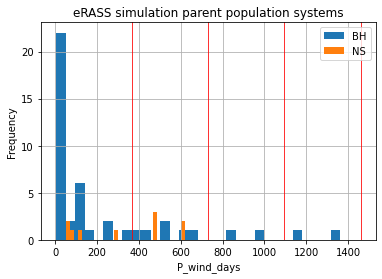

In [64]:
plt.title('eRASS simulation parent population systems')
plt.xlabel(r'P_wind_days')
plt.ylabel('Frequency')

erass_parent_pop_bh['P_wind_days'].hist(bins=30, label='BH')
erass_parent_pop_ns['P_wind_days'].hist(bins=30, label='NS')
plt.axvline(365, c='r', linewidth=0.8)
plt.axvline(365*2, c='r', linewidth=0.8)
plt.axvline(365*3, c='r', linewidth=0.8)
plt.axvline(365*4, c='r', linewidth=0.8)
plt.legend()

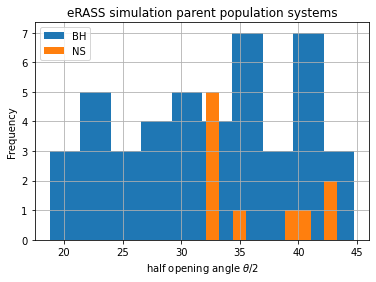

In [65]:
plt.title('eRASS simulation parent population systems')
plt.xlabel(r'half opening angle $\theta / 2$')
plt.ylabel('Frequency')

erass_parent_pop_bh['theta_half_deg'].hist(bins=10, label='BH')
erass_parent_pop_ns['theta_half_deg'].hist(bins=10, label='NS')
plt.legend()

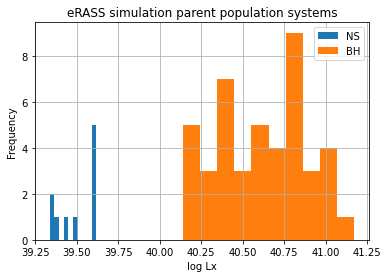

In [66]:
plt.title('eRASS simulation parent population systems')
plt.xlabel(r'log Lx')
plt.ylabel('Frequency')

np.log10(erass_parent_pop_ns['Lx']).hist(bins=10, label='NS')
np.log10(erass_parent_pop_bh['Lx']).hist(bins=10, label='BH')

plt.legend()

In [74]:
bright = df_ulx[df_ulx['Lx'] > 1E42]
bright.columns

Index(['mdot', 'm', 'Z', 'tage', 'is_bh', 'mdot_gs', 'LEdd', 'MEdd',
       'mdot_ratio', 'XLsph', 'XLsph2', 'LXtot', 'b', 'Lx', 'ratio',
       'ratio_beamed', 'theta', 'theta_deg', 'theta_half_deg', 'zeta', 'R_g',
       'a*', 'r_schw', 'r_isco_nospin', 'r_isco', 'r_sph', 'r_out',
       'P_inflow_at_rsph', 'P_envelope', 'P_wind', 'P_inflow_days',
       'P_envelope_days', 'P_wind_days'],
      dtype='object')

In [79]:
bright[['m', 'is_bh', 'LEdd', 'mdot_ratio', 'b', 'Lx', 'theta_half_deg']]

,m,is_bh,LEdd,mdot_ratio,b,Lx,theta_half_deg
28,8.2,1,9.840000e+38,124.902269,0.004679,1.225455e+42,5.544958
37,22.7,1,2.724000e+39,746.196885,0.003200,6.482260e+42,4.584886
68,22.7,1,2.724000e+39,133.621303,0.004089,3.927536e+42,5.182883
146,22.2,1,2.664000e+39,177.442586,0.003200,5.143724e+42,4.584886
171,16.2,1,1.944000e+39,3161.106816,0.003200,5.503147e+42,4.584886
181,30.8,1,3.696000e+39,358.111401,0.003200,7.947375e+42,4.584886
399,23.1,1,2.772000e+39,460.428945,0.003200,6.178232e+42,4.584886
421,31.7,1,3.804000e+39,745.594716,0.003200,9.051359e+42,4.584886
451,13.9,1,1.668000e+39,1331.968306,0.003200,4.271338e+42,4.584886
493,24.3,1,2.916000e+39,437.691713,0.003200,6.453030e+42,4.584886
